In [7]:
# create contact with url and check status

import requests

url = 'https://bina.az/baki/alqi-satqi/menziller'
api_key = 'a418ec7a1656038d81e4409b0e575eff'  # Replace with your ScraperAPI key  
proxy_url = f'http://api.scraperapi.com?api_key={api_key}&url={url}'

response = requests.get(proxy_url)

print(response.status_code)
print(response.text[:500]) 

200
<!DOCTYPE html><html lang="az"><head><title>Mənzil almaq, Bakı - bina.az</title><meta charset="UTF-8" /><meta content="Azərbaycanda pulsuz daşınmaz əmlak elanları - bina.az. Mənzil almaq, Bakı kateqoriyasında bütün elanlar" name="description" /><link href="https://bina.azstatic.com/assets/favicons/favicon-192x192-b40ea6169e17d157d4e6943453ee0f32374348b53abc40010d2ff8c81a2263ec.png" rel="apple-touch-icon" sizes="192x192" /><link href="https://bina.azstatic.com/assets/favicons/favicon-192x192-b40e


In [9]:

#Extracting all listening for each page 
from bs4 import BeautifulSoup
import requests


html_content=response.text
soup=BeautifulSoup(html_content,"html.parser")

href=soup.find_all('a' ,href=True)
href


first_page_url='https://bina.az/baki/alqi-satqi/menziller'
base_url='https://bina.az/baki/alqi-satqi/menziller?page='

current_page=2
max_page=200
linkdata=set()


def scrape_listings(url):
    
    api_key = 'a418ec7a1656038d81e4409b0e575eff'  # Replace with your ScraperAPI key
    proxy_url = f'http://api.scraperapi.com?api_key={api_key}&url={url}'

    response = requests.get(proxy_url)

# checking url status 
    if response.status_code != 200:
        print(f"Failed fetch url {url} ,stopping")
        return False


        
    
    soup=BeautifulSoup(response.text,"html.parser")

    href=soup.find_all('a' ,href=True)


    new_linkset=set()
    for link in href:
        linkset=link['href']
        if '/items/' in linkset and all(x not in linkset for x in ['=','all','new']):
            new_linkset.add('https://bina.az'+linkset)

    linkdata.update(new_linkset)
            
    print(f"Etracted {len(new_linkset)}  listings from {url} . total listenings {len(linkdata)}")
    return True

scrape_listings(first_page_url)

while current_page<=max_page:
    page_url=f"{base_url}{current_page}"
    success=scrape_listings(page_url)


    if not success:
        break

    current_page +=1


print(f"\n✅ Scraping finished! Total unique listings extracted: {len(linkdata)}")



     


Etracted 28  listings from https://bina.az/baki/alqi-satqi/menziller . total listenings 28
Etracted 28  listings from https://bina.az/baki/alqi-satqi/menziller?page=151 . total listenings 56
Etracted 28  listings from https://bina.az/baki/alqi-satqi/menziller?page=152 . total listenings 84
Etracted 28  listings from https://bina.az/baki/alqi-satqi/menziller?page=153 . total listenings 111
Etracted 27  listings from https://bina.az/baki/alqi-satqi/menziller?page=154 . total listenings 138
Etracted 28  listings from https://bina.az/baki/alqi-satqi/menziller?page=155 . total listenings 165
Etracted 28  listings from https://bina.az/baki/alqi-satqi/menziller?page=156 . total listenings 192
Etracted 28  listings from https://bina.az/baki/alqi-satqi/menziller?page=157 . total listenings 220
Etracted 28  listings from https://bina.az/baki/alqi-satqi/menziller?page=158 . total listenings 248
Etracted 28  listings from https://bina.az/baki/alqi-satqi/menziller?page=159 . total listenings 275
Et

In [29]:

# checked dublicates over  extracted listings 

seen=set()
dublicates=set()

for links in linkdata2:
    if links in seen:
        dublicates.add(links)
    else :
        seen.add(links)

if dublicates:
    print('Dublicate link found' ,dublicates)
else :
    print('No Dublicate')


No Dublicate


In [23]:
# create datafram from linkdata

import pandas as pd
import numpy as np
import re

Proporties_info=pd.DataFrame(columns=['Category','Area_m2','Floor','Building_Floor_count','Room_Count','Price','Currency','Location','Repair','Distirict'])
rows = []


for itm in linkdata:
    try: 

        api_key = 'a418ec7a1656038d81e4409b0e575eff'  # Replace with your ScraperAPI key
        proxy_url = f'http://api.scraperapi.com?api_key={api_key}&url={itm}'

        response = requests.get(proxy_url)

        if response.status_code != 200:
            print(f"Failed to fetch {itm}")

        soup = BeautifulSoup(response.text, "html.parser")

        
        kiraye=soup.find_all('div' , class_= 'product-properties__column')
        price=soup.find_all('div',class_='product-price')
        location=soup.find_all('ul' , class_='product-extras bz-d-flex bz-align-center bz-gap-15 bz-wrap-wrap')
        lct=soup.find_all('a' ,class_='open_map')
        ozellikler= re.sub('<[^>]+>', ' ', str(kiraye)).split('  ')  # neticeye bax orda '' isaresi niye silmek olmur
        loc=re.sub('<[^>]+>',' ',str(location)).split('  ') 
        lc=re.sub('<[^>]+>' , ' ', str(lct)).split('  ')
        price=re.sub('<[^>]+>', ' ' ,str(price)).split ('  ')


        if len(ozellikler)>14 and len(price)>3:
            kategoriya=ozellikler[2]
            sahe=ozellikler[8].replace('m2','')
            mertebe=ozellikler[5]
            otag_sayi=ozellikler[11]
            qiymet=price[1].replace(' ','')
            kira_novu=price[3].replace('/','')
            valyuta=price[2]
            erazi=str(loc[1:-1]).replace('m2','')
            temir=ozellikler[14]
            Rayon=lc[0].split(', ')
            District=Rayon[1].replace('r.','') if len(Rayon) > 1 else np.nan



            new_row = {
                'Category': kategoriya,
                'Area_m2': sahe,
                'Floor': mertebe.split('/')[0],
                'Building_Floor_count' : mertebe.split('/')[1],
                'Room_Count': otag_sayi,
                'Price': qiymet,
                'Currency': valyuta,
                'Location': erazi,
                'Repair': temir,
                'Distirict' : District
            } 


            rows.append(new_row)
            print(f"Extracted link count : {itm}")
            
            # Add the new row to the list

           



    except Exception as e: 
        print(e)

       
        
        

if rows:
    df = pd.concat([Proporties_info, pd.DataFrame(rows)], ignore_index=True)
    print(df)

           





Extracted link count : https://bina.az/items/5004576
Extracted link count : https://bina.az/items/4936652
Extracted link count : https://bina.az/items/5015922
Extracted link count : https://bina.az/items/4894081
Extracted link count : https://bina.az/items/4808605
Extracted link count : https://bina.az/items/5074158
Extracted link count : https://bina.az/items/5091922
Extracted link count : https://bina.az/items/4621986
Extracted link count : https://bina.az/items/5074794
Extracted link count : https://bina.az/items/4404201
Extracted link count : https://bina.az/items/5068771
Extracted link count : https://bina.az/items/4952660
Extracted link count : https://bina.az/items/5077973
Extracted link count : https://bina.az/items/5107895
Extracted link count : https://bina.az/items/5049499
Extracted link count : https://bina.az/items/5095426
Extracted link count : https://bina.az/items/5066913
Extracted link count : https://bina.az/items/5072364
Extracted link count : https://bina.az/items/5

#Explore dataset

In [86]:
#Explore dataset
print(f'Dataframe shape : {df.shape} ')

print('Null values count by columns')

print(df.isnull().sum())

print(' Datframe columns descriptions')

print(df.info())

Dataframe shape : (3221, 10) 
Null values count by columns
Category                  0
Area_m2                   0
Floor                     0
Building_Floor_count      0
Room_Count                0
Price                     0
Currency                  0
Location                  0
Repair                    0
Distirict               823
dtype: int64
 Datframe columns descriptions
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Category              3221 non-null   object
 1   Area_m2               3221 non-null   object
 2   Floor                 3221 non-null   int64 
 3   Building_Floor_count  3221 non-null   int64 
 4   Room_Count            3221 non-null   int64 
 5   Price                 3221 non-null   int64 
 6   Currency              3221 non-null   object
 7   Location              3221 non-null   object
 8   Repai

In [88]:
# create avg price for analyze 
def avg_price (row):

    if row['Price']<=100000:
        return 100000
    elif row['Price'] >100000 and row['Price'] <=200000:
        return 200000
    elif row['Price']>200000 and row['Price']<=300000:
        return 300000
    elif row['Price']>300000 and row['Price']<=500000:
        return 500000
    elif row['Price']>500000 and row ['Price']<=700000:
        return 700000
    elif row['Price']>700000 and row ['Price']<=1000000:
        return 1000000
    else:
        return +1000000
    
df['Avg_Price'] = df.apply(avg_price, axis=1)
df.head(10)

,Category,Area_m2,Floor,Building_Floor_count,Room_Count,Price,Currency,Location,Repair,Distirict,Avg_Price
0,Yeni tikili,271 m²,6,21,4,610000,AZN,"[' Elmlər Akademiyası m.', '', 'İnşaatçılar m....",yoxdur,"Yasamal ,",700000
1,Yeni tikili,500 m²,18,19,7,830000,AZN,"[' Təhsil Nazirliyi', '', ' Nərimanov r.']",var,Nərimanov,1000000
2,Yeni tikili,128 m²,12,19,3,285000,AZN,"[' Həzi Aslanov m.', '', 'Xətai r.']",var,Bakıxanov qəs.,300000
3,Yeni tikili,139 m²,4,6,4,671000,AZN,"[' Ağ şəhər', '', ' ASAN Xidmət №2', '', ' Xət...",yoxdur,Xətai,700000
4,Yeni tikili,90 m²,15,16,2,160000,AZN,[' Yasamal r.'],var,Suraxanı,200000
5,Yeni tikili,68 m²,3,18,2,152000,AZN,"[' Həzi Aslanov m.', '', 'Xətai r.']",var,Xətai,200000
6,Yeni tikili,67 m²,4,6,2,215000,AZN,"[' Səbail r.', '', 'Şıxov q.']",var,NaN,300000
7,Köhnə tikili,46.5 m²,2,5,2,125000,AZN,"[' Qara Qarayev m.', '', 'Nizami r.', '', '8-c...",var,Nizami,200000
8,Yeni tikili,116 m²,17,18,3,198000,AZN,"[' İnşaatçılar m.', '', 'Yasamal r.', '', 'Yen...",var,Nəsimi,200000
9,Yeni tikili,90 m²,8,16,2,252000,AZN,"[' Memar Əcəmi m.', '', 'Nəsimi r.']",var,Bakı ş.,300000


Distirubition of numeric columuns accros to the Price values

/var/folders/hg/0t32ql517rb1rv67vm51gzm40000gn/T/ipykernel_73113/4242499407.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data,x='Price' ,hue=clmn ,shade=True)


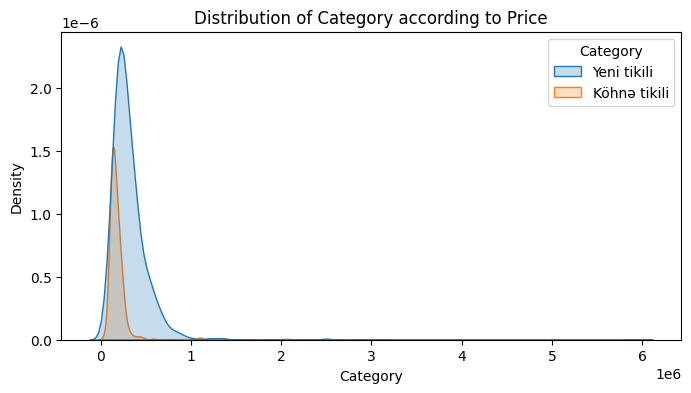

/var/folders/hg/0t32ql517rb1rv67vm51gzm40000gn/T/ipykernel_73113/4242499407.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data,x='Price' ,hue=clmn ,shade=True)
/var/folders/hg/0t32ql517rb1rv67vm51gzm40000gn/T/ipykernel_73113/4242499407.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data,x='Price' ,hue=clmn ,shade=True)


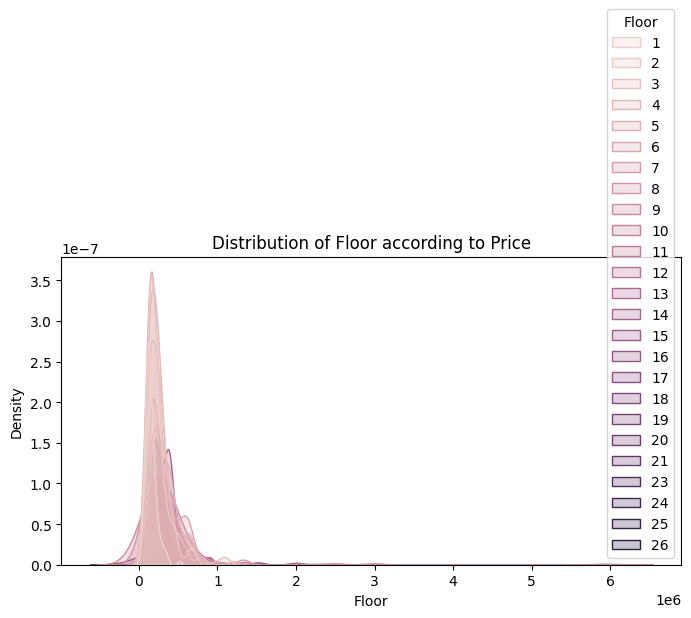

/var/folders/hg/0t32ql517rb1rv67vm51gzm40000gn/T/ipykernel_73113/4242499407.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data,x='Price' ,hue=clmn ,shade=True)
/var/folders/hg/0t32ql517rb1rv67vm51gzm40000gn/T/ipykernel_73113/4242499407.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data,x='Price' ,hue=clmn ,shade=True)


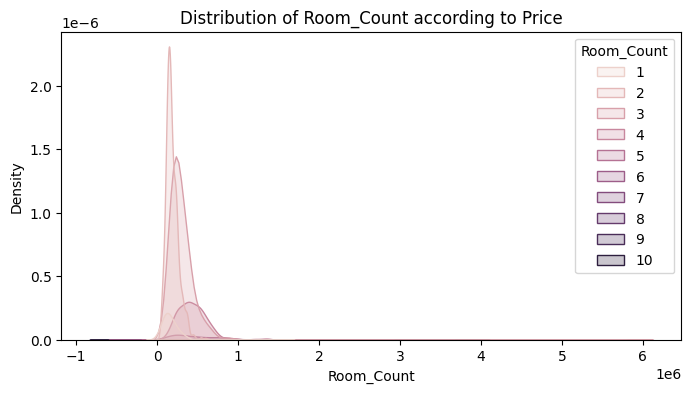

/var/folders/hg/0t32ql517rb1rv67vm51gzm40000gn/T/ipykernel_73113/4242499407.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data,x='Price' ,hue=clmn ,shade=True)


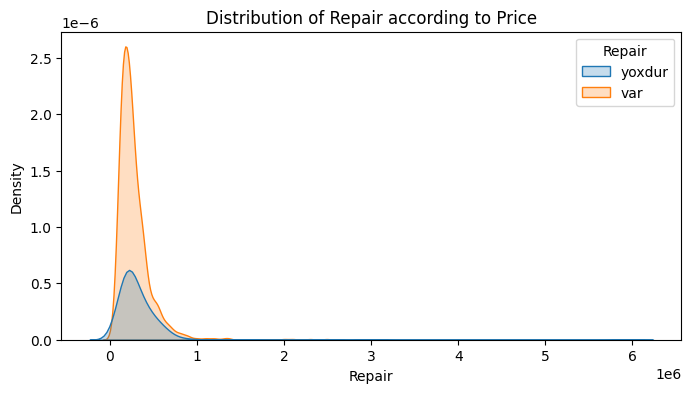

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

column_list=['Category','Floor','Room_Count','Repair','Price']

def histogram_columns(data):

    filtered_columns=[col for col in column_list if col !='Price']

    for clmn in filtered_columns:
        plt.figure(figsize=(8,4))
        sns.kdeplot(data=data,x='Price' ,hue=clmn ,shade=True)
        
        plt.title(f'Distribution of {clmn} according to Price')
        plt.xlabel(clmn)
        plt.ylabel('Density')
        plt.show()
histogram_columns(df)

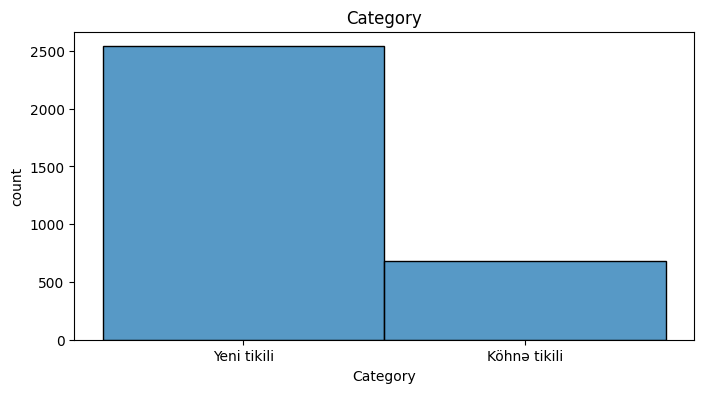

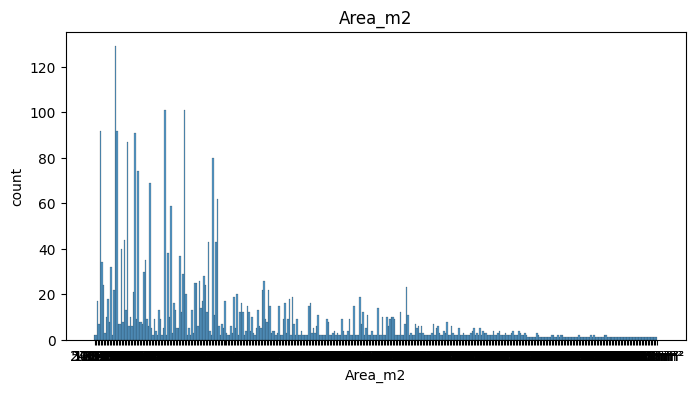

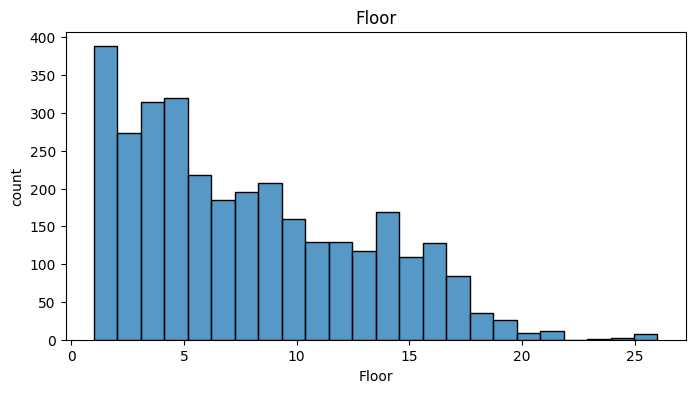

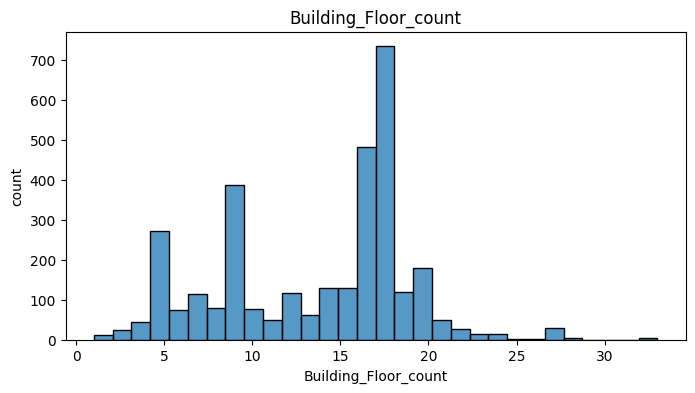

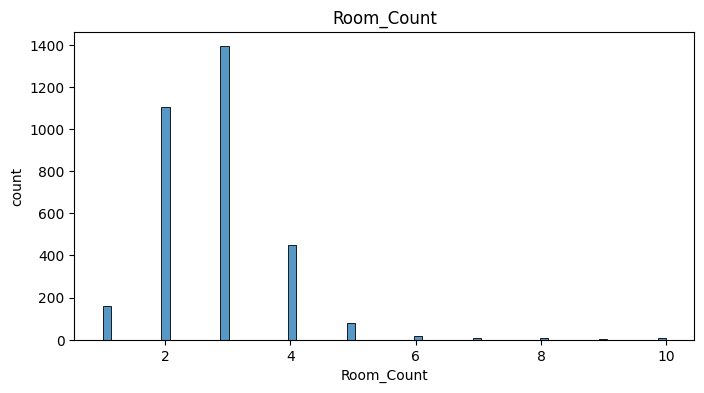

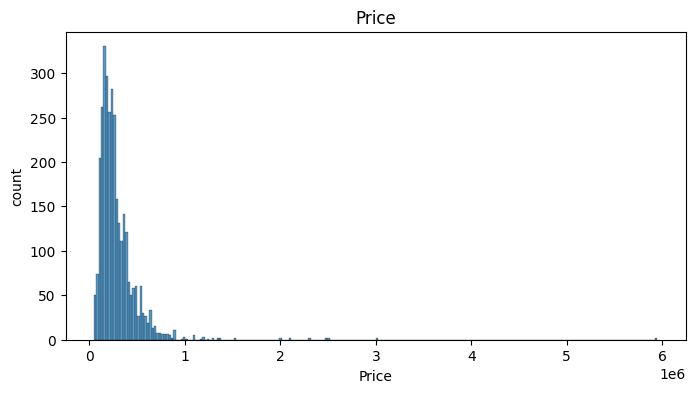

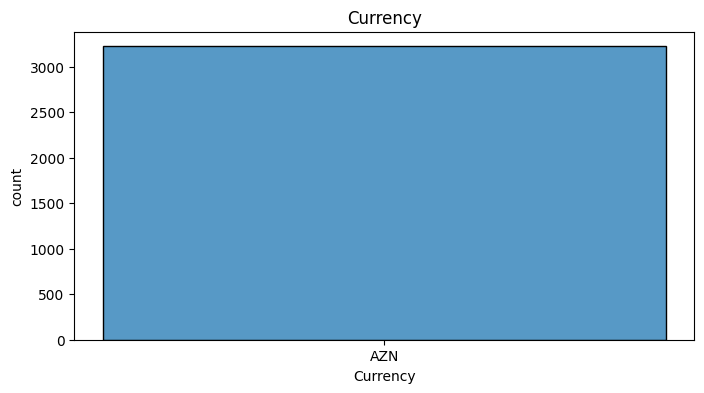

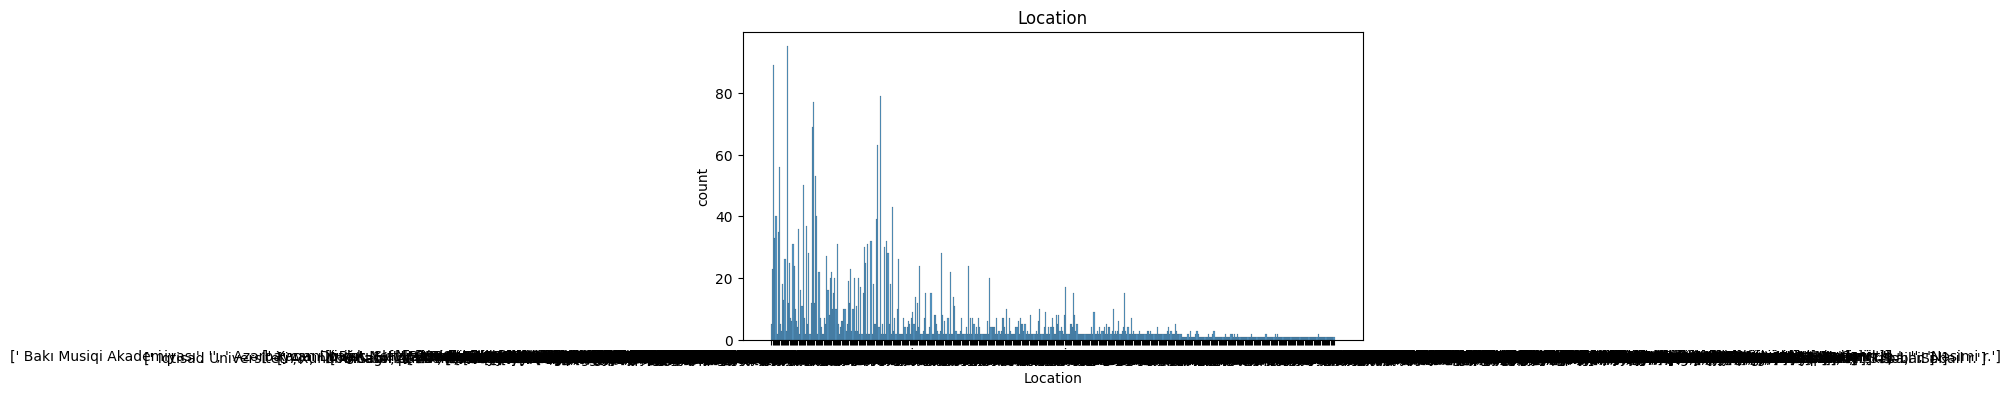

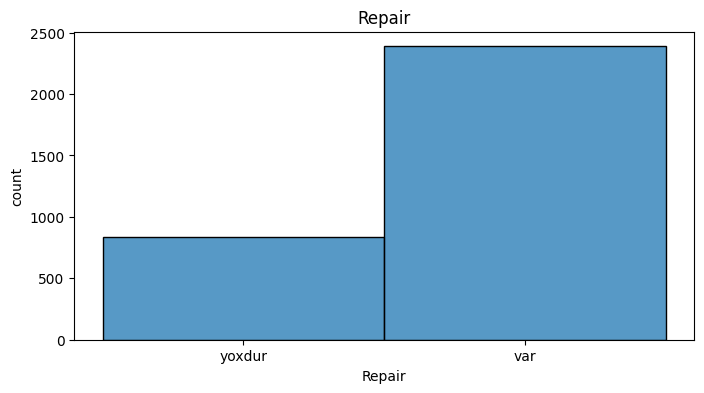

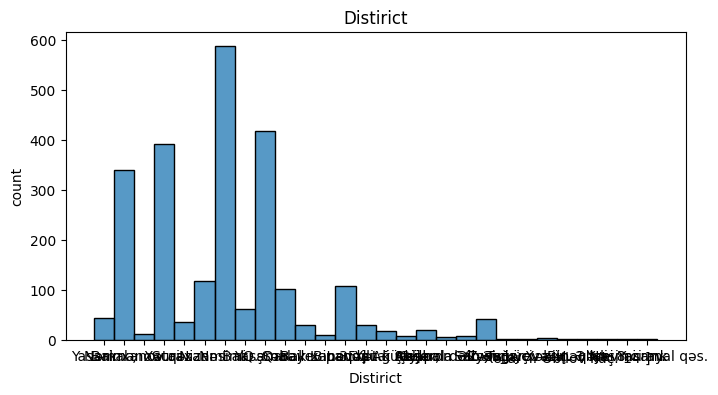

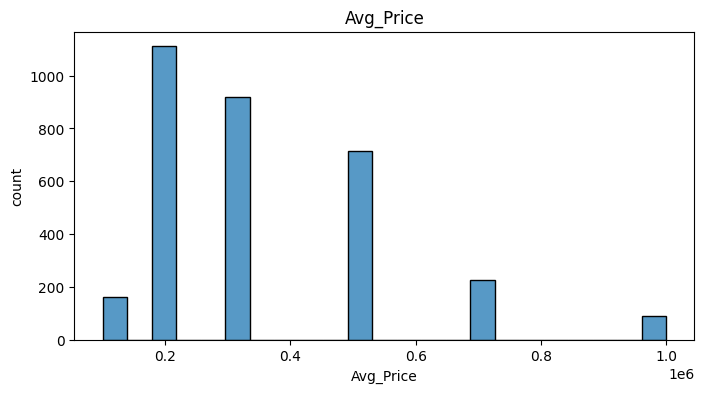

In [11]:
#explore all columns by histogram
def histogram_of_columns(data):
    
    for clmn in data.columns:
        plt.figure(figsize=(8,4))
        sns.histplot(data[clmn] ,kde=False)
        plt.title(clmn)
        plt.xlabel(clmn)
        plt.ylabel('count')
        plt.show()
    

histogram_of_columns(df)

#Cleaning miss values and modifying columuns


In [92]:
# remove m2 in Area_m2 column

#df['Area_m2']=df['Area_m2'].str.replace(r'\D+' , '',regex=True).astype(int)


# Fill the null values in Distirict columns  with values which contains in Location 

def location_clmn(row):
    # Only process rows where Distirict is NaN
    if pd.isna(row['Distirict']):
        # Split Location by comma (handle multiple parts)
        location_parts = row['Location'].split(',')
        
        # Iterate through each part of Location
        for loc in location_parts:
            if ' r.' in loc:  # Check if 'r' is in the location part
                # Return modified location (remove 'r' and strip spaces)
                cleaned = loc.replace(' r.', '').replace(' r.]', '').replace(']' , '').replace('[' , '' ).replace(' r', '').replace("'" , '').strip()

                

                return cleaned
        
        # If no part of Location contains 'r', return 'Unknown'
        return 'Unknown'
    
    # If Distirict is not NaN, return the original value
    return row['Distirict']

df['New District']=df.apply(location_clmn,axis=1)
df.head(10)

,Category,Area_m2,Floor,Building_Floor_count,Room_Count,Price,Currency,Location,Repair,Distirict,Avg_Price,New District
0,Yeni tikili,271 m²,6,21,4,610000,AZN,"[' Elmlər Akademiyası m.', '', 'İnşaatçılar m....",yoxdur,"Yasamal ,",700000,"Yasamal ,"
1,Yeni tikili,500 m²,18,19,7,830000,AZN,"[' Təhsil Nazirliyi', '', ' Nərimanov r.']",var,Nərimanov,1000000,Nərimanov
2,Yeni tikili,128 m²,12,19,3,285000,AZN,"[' Həzi Aslanov m.', '', 'Xətai r.']",var,Bakıxanov qəs.,300000,Bakıxanov qəs.
3,Yeni tikili,139 m²,4,6,4,671000,AZN,"[' Ağ şəhər', '', ' ASAN Xidmət №2', '', ' Xət...",yoxdur,Xətai,700000,Xətai
4,Yeni tikili,90 m²,15,16,2,160000,AZN,[' Yasamal r.'],var,Suraxanı,200000,Suraxanı
5,Yeni tikili,68 m²,3,18,2,152000,AZN,"[' Həzi Aslanov m.', '', 'Xətai r.']",var,Xətai,200000,Xətai
6,Yeni tikili,67 m²,4,6,2,215000,AZN,"[' Səbail r.', '', 'Şıxov q.']",var,NaN,300000,Səbail
7,Köhnə tikili,46.5 m²,2,5,2,125000,AZN,"[' Qara Qarayev m.', '', 'Nizami r.', '', '8-c...",var,Nizami,200000,Nizami
8,Yeni tikili,116 m²,17,18,3,198000,AZN,"[' İnşaatçılar m.', '', 'Yasamal r.', '', 'Yen...",var,Nəsimi,200000,Nəsimi
9,Yeni tikili,90 m²,8,16,2,252000,AZN,"[' Memar Əcəmi m.', '', 'Nəsimi r.']",var,Bakı ş.,300000,Bakı ş.


In [94]:
#Create top 5 District and remove m2 
df.columns
df['New District']=df['New District'].str.replace(' ' , '').str.strip()
#df['New District'].unique()
top_5_distirict=df['New District'].value_counts().head(5).index.tolist()
df['District_5']=df['New District'].apply(lambda x : x if x in top_5_distirict else 'Other' )
df['District_5'].unique()
# Remove some useless columns
df.drop(columns=['Currency','Location','Distirict','New District','Avg_Price'],inplace=True)
df['Area_m2']=df['Area_m2'].str.replace(r'\D+' , '',regex=True).astype(int)

df.head()

,Category,Area_m2,Floor,Building_Floor_count,Room_Count,Price,Repair,District_5
0,Yeni tikili,271,6,21,4,610000,yoxdur,Other
1,Yeni tikili,500,18,19,7,830000,var,Nərimanov
2,Yeni tikili,128,12,19,3,285000,var,Other
3,Yeni tikili,139,4,6,4,671000,yoxdur,Xətai
4,Yeni tikili,90,15,16,2,160000,var,Other


In [28]:
print(df.head(10))
print(df.info())
print(df.isnull().sum())

       Category  Area_m2  Floor  Building_Floor_count  Room_Count   Price  \
0   Yeni tikili      271      6                    21           4  610000   
1   Yeni tikili      500     18                    19           7  830000   
2   Yeni tikili      128     12                    19           3  285000   
3   Yeni tikili      139      4                     6           4  671000   
4   Yeni tikili       90     15                    16           2  160000   
5   Yeni tikili       68      3                    18           2  152000   
6   Yeni tikili       67      4                     6           2  215000   
7  Köhnə tikili      465      2                     5           2  125000   
8   Yeni tikili      116     17                    18           3  198000   
9   Yeni tikili       90      8                    16           2  252000   

   Repair  Avg_Price District_5  
0  yoxdur     700000      Other  
1     var    1000000  Nərimanov  
2     var     300000      Other  
3  yoxdur     70

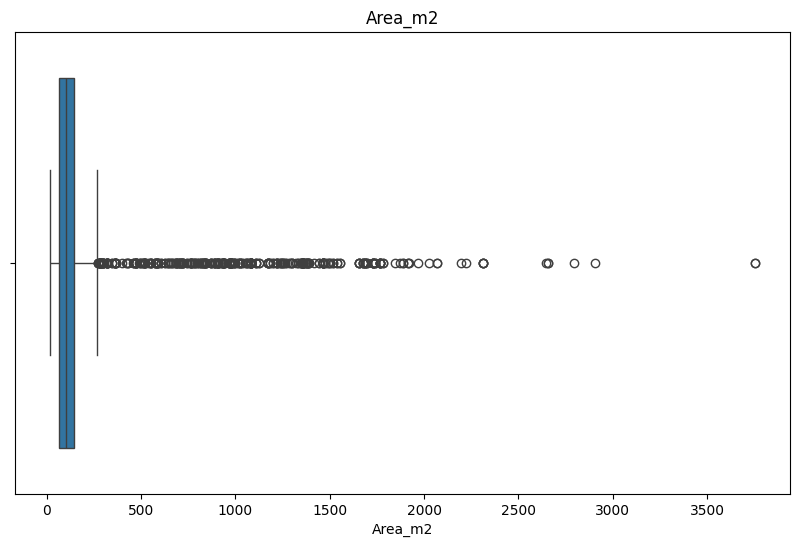

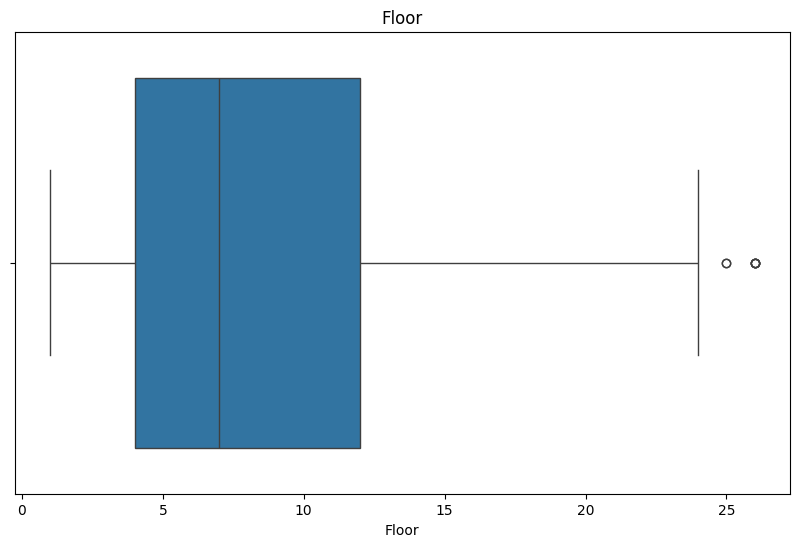

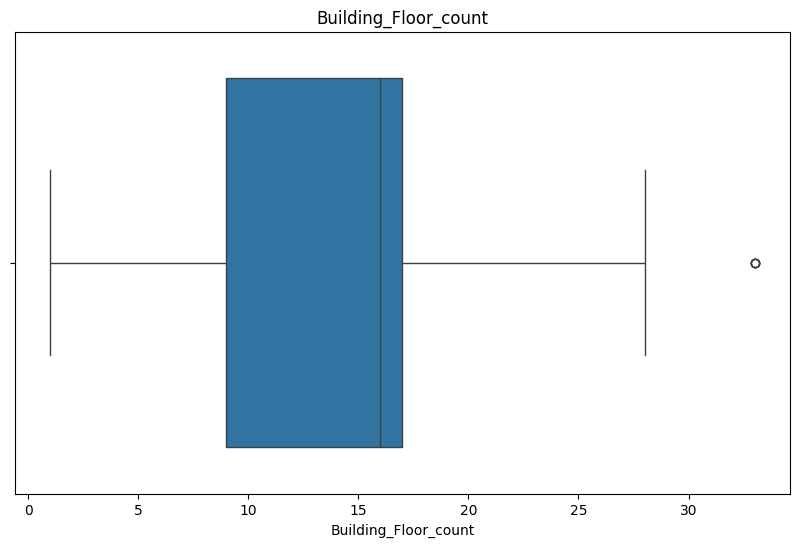

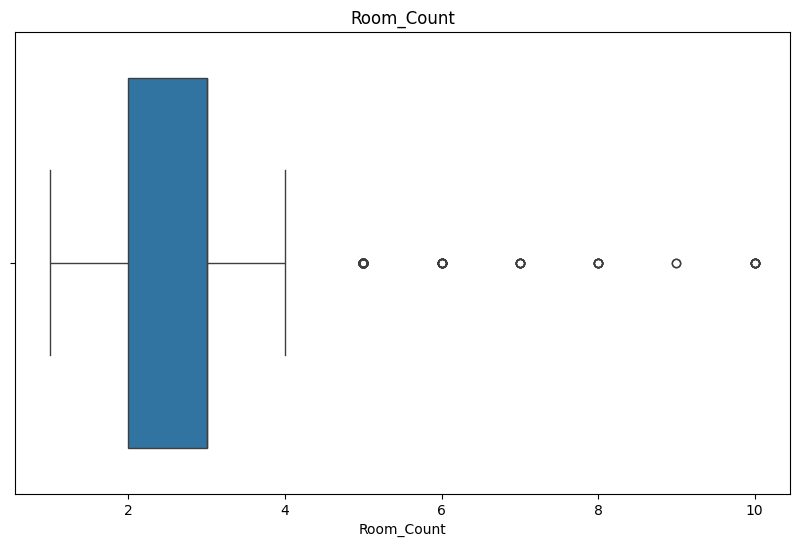

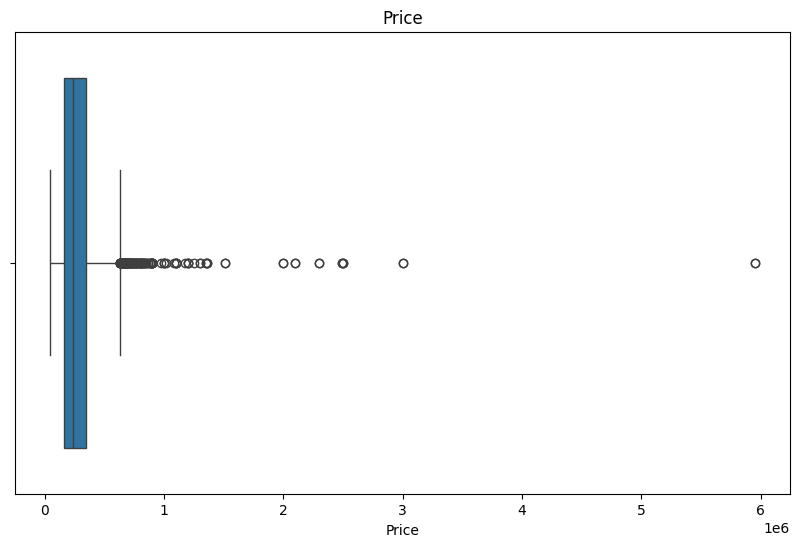

In [34]:
#Detect columns which are has outliers 

columun_list=['Area_m2','Floor','Building_Floor_count','Room_Count','Price']

for i in df[columun_list] :
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [40]:
# Detect Outliers on price columun
# Considering leaner regression model therefore would better  in order to  remove outliers in target 
# remove Target outliers (Price)

print(f'Before remove outliers : {df.shape}')
Q1=df['Price'].quantile(0.25)
Q3=df['Price'].quantile(0.75)
IQR=Q3-Q1
df_without_out=df[df['Price']<=(Q3+1.5*IQR)]
df_without_out

print(f'After remove outliers : {df_without_out.shape}')



Before remove outliers : (3221, 9)
After remove outliers : (3074, 9)


One-Hot encoding

In [96]:
#Transform some columuns as Dummy (One-hot encoding)
df_dummies=pd.get_dummies(df,columns=['Category','Repair','District_5'],drop_first=True,dtype='int')
df_dummies

,Area_m2,Floor,Building_Floor_count,Room_Count,Price,Category_Yeni tikili,Repair_yoxdur,District_5_Nərimanov,District_5_Nəsimi,District_5_Other,District_5_Xətai,District_5_Yasamal
0,271,6,21,4,610000,1,1,0,0,1,0,0
1,500,18,19,7,830000,1,0,1,0,0,0,0
2,128,12,19,3,285000,1,0,0,0,1,0,0
3,139,4,6,4,671000,1,1,0,0,0,1,0
4,90,15,16,2,160000,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3216,127,16,20,3,373000,1,1,0,0,0,1,0
3217,100,6,18,3,309000,1,0,1,0,0,0,0
3218,110,12,18,3,309000,1,0,0,0,1,0,0
3219,155,4,20,4,285000,1,0,0,0,0,1,0


Corrolation Test

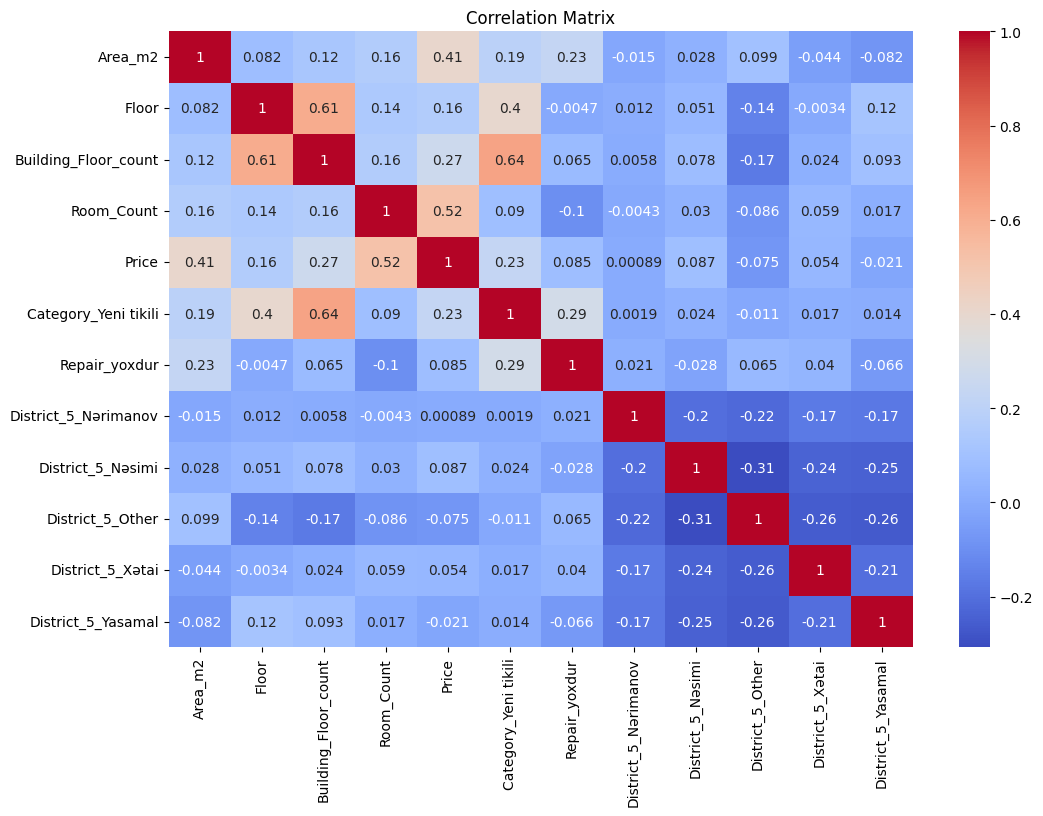

In [98]:
# Corralation test

correlation_matrix=df_dummies.corr()


plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix , annot=True , cmap='coolwarm' )
plt.title('Correlation Matrix')
plt.show()



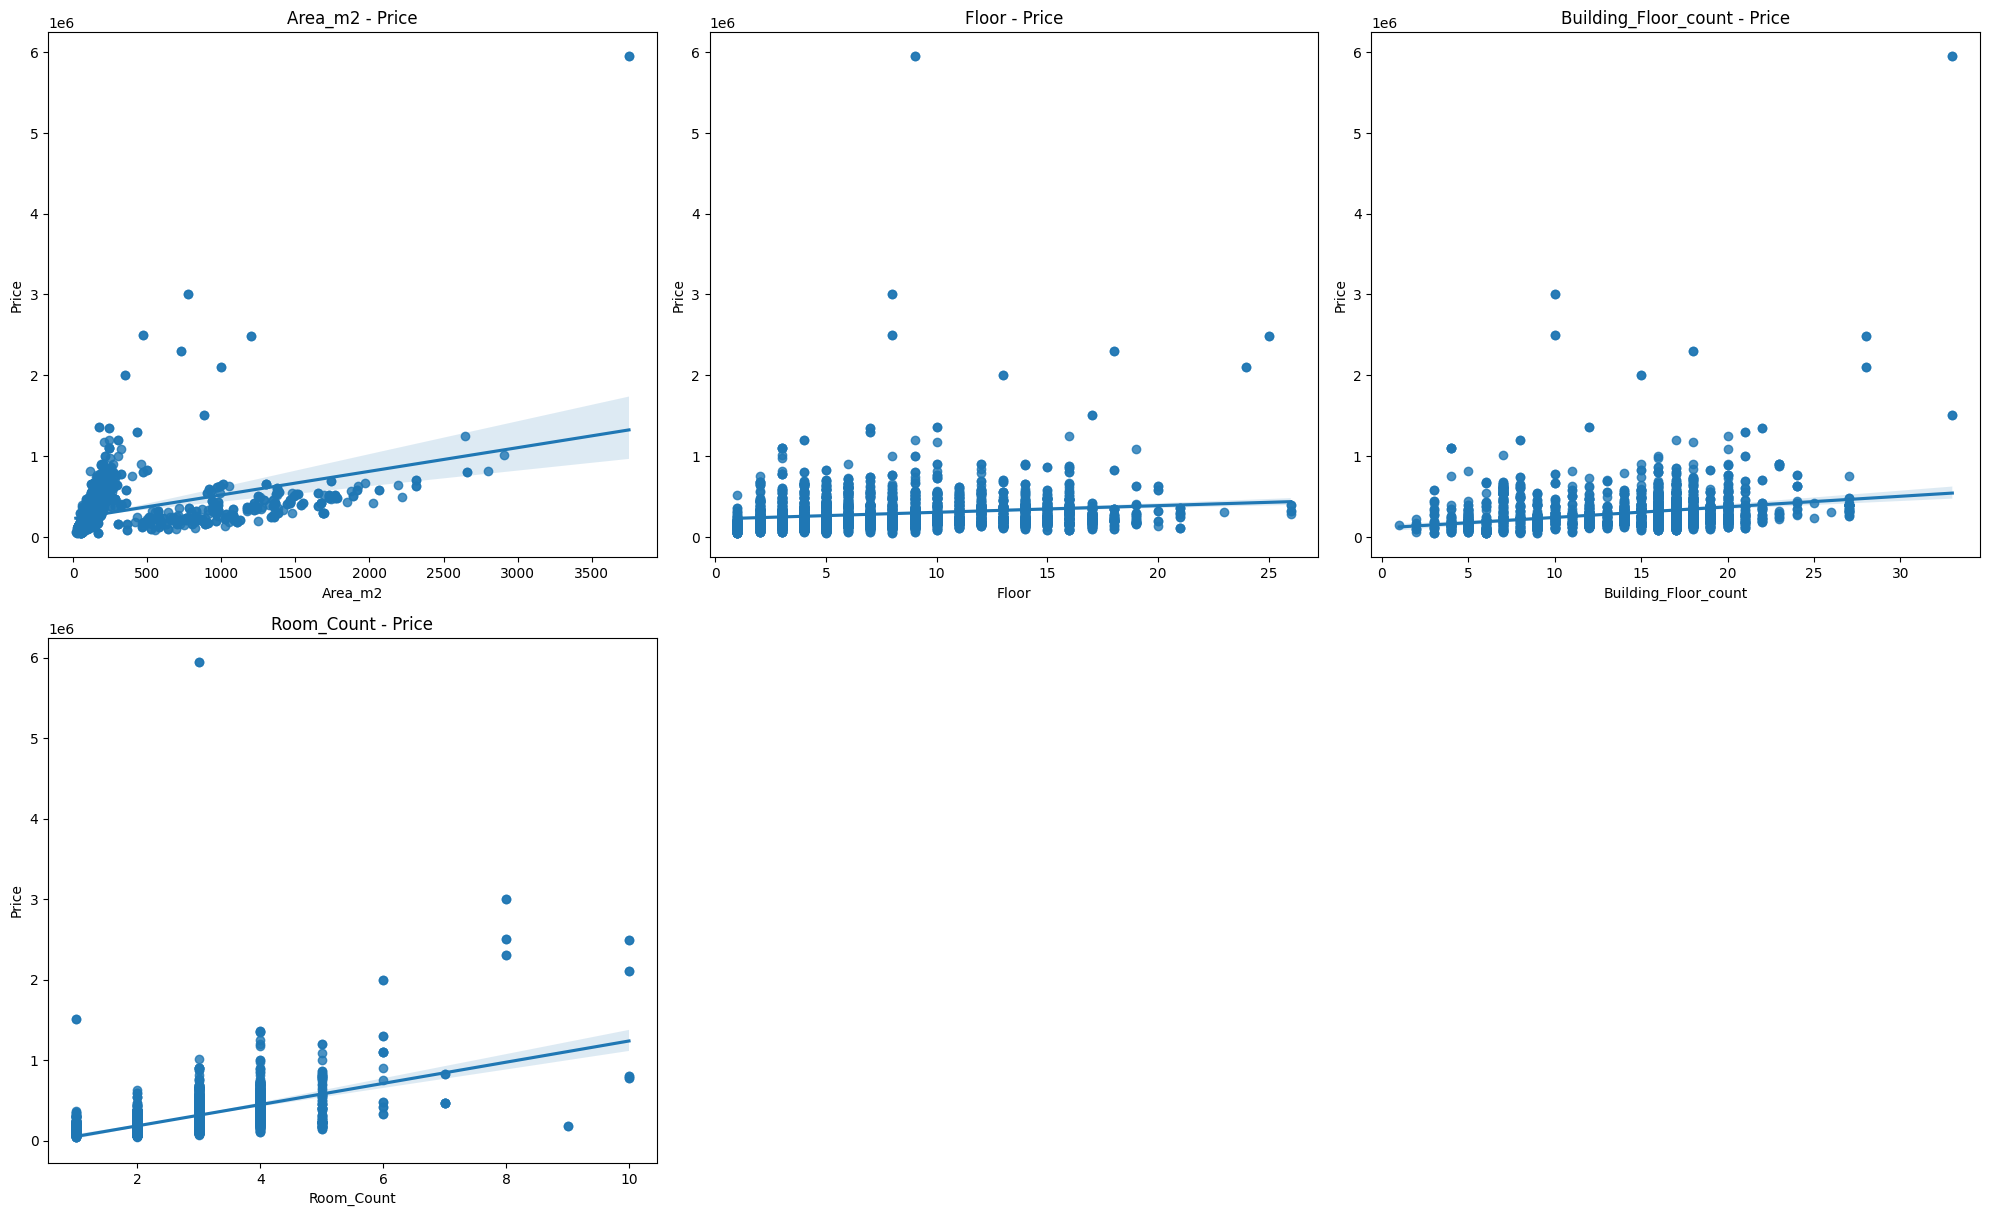

In [100]:
# cheking regression between target and independent columns 

cols=[ 'Area_m2','Floor' ,'Building_Floor_count' ,'Room_Count']
plt.figure(figsize=(20,30))



for i in range(len(cols)):
    plt.subplot(5, 3, i + 1)
    plt.title(cols[i] + ' - Price')
    
    
    sns.regplot(x=df_dummies[cols[i]], y=df_dummies.Price)

plt.tight_layout()
plt.show()

Split Train-test

In [104]:
from sklearn.model_selection import train_test_split
X=df_dummies.drop(columns=['Price'])
y=df_dummies['Price']

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)



print(f'X_train :{X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train :{y_train.shape}')
print(f'y_test :{y_test.shape}')

X_train :(2576, 11)
X_test: (645, 11)
y_train :(2576,)
y_test :(645,)


In [106]:
# Demonstrate 3 type of model in order to decide best one 

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the models in a dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Loop through each model and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"🔹 {name}")
    print(f"   ✅ MSE: {mse:.2f}")
    print(f"   ✅ R² Score: {r2:.4f}")
    print("-" * 40)

🔹 Linear Regression
   ✅ MSE: 63864008275.01
   ✅ R² Score: 0.3701
----------------------------------------
🔹 Random Forest
   ✅ MSE: 11091210794.62
   ✅ R² Score: 0.8906
----------------------------------------
🔹 XGBoost
   ✅ MSE: 5260629251.84
   ✅ R² Score: 0.9481
----------------------------------------


In [108]:
# Make feature enginner for Leaner regression 

df=df_dummies.copy()
df_avg_area=df.groupby('Area_m2')['Price'].mean().reset_index(name='AVG_area_price')
df_merged=pd.merge(df,df_avg_area,on=['Area_m2'],how='left')
df_merged

,Area_m2,Floor,Building_Floor_count,Room_Count,Price,Category_Yeni tikili,Repair_yoxdur,District_5_Nərimanov,District_5_Nəsimi,District_5_Other,District_5_Xətai,District_5_Yasamal,AVG_area_price
0,271,6,21,4,610000,1,1,0,0,1,0,0,610000.000000
1,500,18,19,7,830000,1,0,1,0,0,0,0,830000.000000
2,128,12,19,3,285000,1,0,0,0,1,0,0,287176.470588
3,139,4,6,4,671000,1,1,0,0,0,1,0,438000.000000
4,90,15,16,2,160000,1,0,0,0,1,0,0,236617.391304
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,127,16,20,3,373000,1,1,0,0,0,1,0,332444.444444
3217,100,6,18,3,309000,1,0,1,0,0,0,0,253167.065217
3218,110,12,18,3,309000,1,0,0,0,1,0,0,261794.202899
3219,155,4,20,4,285000,1,0,0,0,0,1,0,378458.333333


In [124]:

# After feature engineering / Train test split / Model Evaluation

X=df_merged.drop(columns=['Price'])
y=df_merged['Price']

X_tr,X_tst,y_tr,y_tst=train_test_split(X, y, test_size=0.2, random_state=42)



print(f'X_train :{X_tr.shape}')
print(f'X_test: {X_tst.shape}')
print(f'y_train :{y_tr.shape}')
print(f'y_test :{y_tst.shape}')





models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Loop through each model and evaluate
for name, model in models.items():
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_tst)
    
    mse = mean_squared_error(y_tst, y_pred)
    r2 = r2_score(y_tst, y_pred)
    
    print(f"🔹 {name}")
    print(f"   ✅ MSE: {mse:.2f}")
    print(f"   ✅ R² Score: {r2:.4f}")
    print("-" * 40)

X_train :(2576, 12)
X_test: (645, 12)
y_train :(2576,)
y_test :(645,)
🔹 Linear Regression
   ✅ MSE: 6939373015.77
   ✅ R² Score: 0.9316
----------------------------------------
🔹 Random Forest
   ✅ MSE: 6571074388.03
   ✅ R² Score: 0.9352
----------------------------------------
🔹 XGBoost
   ✅ MSE: 3680247741.16
   ✅ R² Score: 0.9637
----------------------------------------
